# <font color = '#32CD32' size='5'>0. .mat to .nii converter</font>

In [ ]:
import scipy.io as sio
import numpy as np
import nibabel as nib
import os
path = 'C:\pipeline test\Axi50'
files_0 = os.listdir(path)
for i in files_0:
    if i.endswith('.mat'):
        # Load .mat file
        mat_file = sio.loadmat(f'{path}\\{i}')
        k = i[:-4]
        # Access the data from the loaded file
        data = mat_file['volData']

        # Convert to NIfTI format
        nifti_img = nib.Nifti1Image(data, np.eye(4))  # Assuming identity affine transformation

        # Save as .nii file
        nib.save(nifti_img, f'{path}\out\{k}.nii')

# <font color = '#800000' size=6>Image preprocessing </font>   

# <font color = '#32CD32'>0. Nifti dimentions converter </font>

><font size='5'> 1. Uploads file from '**folder_path**' </font>
>
><font size='5'>2. Returns converted files to '**out_path**' folder </font>


The '**matlab_script_converter_nifti**', '**folder_path**' and '**out_path**' need to be defined

In [1]:
import os
import subprocess

matlab_script_path = r'D:\!PIPELINE\!Final Pack\convertNIfTI.m'  # Define path to the MATLAB script

folder_path = r'D:\!PIPELINE\article figures'  # Define the path to the folder containing the images

out_path = rf'{folder_path}\Scaled'  # Define the path to an output folder

# Voxel dimentions settings
messages = ['Input X (um): ', 'Input Y (um): ', 'Input Z (um): ']
dim1, dim2, dim3 = [float(input(msg)) for msg in messages]
matlab_script_dir = os.path.dirname(matlab_script_path)
matlab_command = f'matlab -nodesktop -nosplash -r "cd(\'{matlab_script_dir}\'); convertNIfTI(\'{folder_path}\', \'{out_path}\', {dim1}, {dim2}, {dim3}); exit;"'
subprocess.run(matlab_command, shell=True)

CompletedProcess(args='matlab -nodesktop -nosplash -r "cd(\'D:\\!PIPELINE\\!Final Pack\'); convertNIfTI(\'D:\\!PIPELINE\\article figures\', \'D:\\!PIPELINE\\article figures\\Scaled\', 20.0, 20.0, 7.5); exit;"', returncode=0)


# <font color = '#32CD32'>1.  Paths and tags</font>


><font size='5'>1. Define the path to the folder with images  
>  
><font size='5'>2. Select the files of interest by specifying the 'tag'

In [7]:
# Import libraries
import os
import shutil
import re
import scipy
import numpy as np
import random
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
from statannot import add_stat_annotation
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from math import pi

In [3]:
folder_path = input("Enter the folder path: ")
tag = input("Enter the tag for file sorting: ")

print(f'Introduced path:                      {folder_path}')
print(f'Introduced tag for file selection:    {tag}')

Introduced path:                      D:\!PIPELINE\article figures\Scaled
Introduced tag for file selection:    Mouse


# Sort files and copy files into a new folder

In [9]:
def copy_and_rename_files(folder_path, tag):

    """
        Function creates a new folder with the name specified by the tag parameter within the given folder_path.
        A list of files is retrieved and sorted alphabetically in the folder_path.
        The function iterates over each file in the sorted list and extracts the file name without the extension.
        A new file name is constructed using the extracted file name and the provided tag.
        If the tag is detected in the file name, the function proceeds to the subsequent steps.
          Otherwise, a message is printed, indicating that the file name does not contain the matching tag.
        A new folder and a file path are created by combining the tag and the previous file path.
        The file is copied to the new file path using shutil.copy2.
        If the file is being used by another process, the copying operation is repeated up to max_retries times with a delay of 0.1 seconds between repeats.
        If the copying and renaming is successful, a message is printed, indicating the original file name and the new file name in the new folder.
    """

    tagname_folder = os.path.join(folder_path, f'{tag}')
    if not os.path.exists(tagname_folder):
        os.makedirs(tagname_folder)
    files = os.listdir(folder_path)
    files.sort()
    for i, file_name in enumerate(files):

        if tag in file_name:
            file_name_for_strings = file_name.split(".")[0]
            new_file_name = f"{file_name_for_strings}"
            file_extension = os.path.splitext(file_name)[1]
            new_file_path = os.path.join(tagname_folder, new_file_name + file_extension)
            max_retries = 3
            current_retry = 0
            while current_retry < max_retries:
                    try:
                        shutil.copy2(os.path.join(folder_path, file_name), new_file_path)
                        print(f"Copied '{file_name}' as '{new_file_name}{file_extension}' to new folder.")
                        break
                    except PermissionError:
                        current_retry += 1
        else:
            print(f'{file_name}  The filename does not match the pattern')

copy_and_rename_files(folder_path, tag)             # Call the function to copy and rename the files

cold  The filename does not match the pattern
Copied 'scaled_Mouse_cold_temperature1.nii' as 'scaled_Mouse_cold_temperature1.nii' to new folder.
Copied 'scaled_Mouse_cold_temperature2.nii' as 'scaled_Mouse_cold_temperature2.nii' to new folder.
Copied 'scaled_Mouse_cold_temperature3.nii' as 'scaled_Mouse_cold_temperature3.nii' to new folder.
Copied 'scaled_Mouse_hot_temperature1.nii' as 'scaled_Mouse_hot_temperature1.nii' to new folder.
Copied 'scaled_Mouse_hot_temperature2.nii' as 'scaled_Mouse_hot_temperature2.nii' to new folder.
Copied 'scaled_Mouse_hot_temperature3.nii' as 'scaled_Mouse_hot_temperature3.nii' to new folder.
Copied 'scaled_Mouse_norm_temperature1.nii' as 'scaled_Mouse_norm_temperature1.nii' to new folder.
Copied 'scaled_Mouse_norm_temperature2.nii' as 'scaled_Mouse_norm_temperature2.nii' to new folder.
Copied 'scaled_Mouse_norm_temperature3.nii' as 'scaled_Mouse_norm_temperature3.nii' to new folder.


# <font color = '#32CD32'>2. Image preparation</font>

# Provide the path and tag of files to the Avizo console

><font size='5'>Run the cell and paste the following **text output** into Avizo console</font>

In [4]:
new_path = f'{folder_path}\{tag}'

print(f"new_path = r'{new_path}'")
print(f"tag = '{tag}'")

new_path = r'D:\!PIPELINE\article figures\Scaled\Mouse'
tag = 'Mouse'


# <font>ROI selection</font>

><font size='5'>Paste the following **code** into Avizo console</font>

In [ ]:
import os
import re
files_0 = os.listdir(new_path)
files = []

volume_edit_counter = 1            # Number of volume edits

extention = '.nii'             # File extention variable
                               # Change it if you want to open another file types

for file in files_0:

    if file.endswith(extention):
        file_path = os.path.join(new_path, file)
        some_obj = hx_project.load(file_path)
        file = file.replace(" ", "-")
        if volume_edit_counter > 1:
            files.append(file.replace(".nii", f"({volume_edit_counter}).mask"))
        else:
            files.append(file.replace(".nii", ".mask"))
        # Volume rendering
        volumeRenderingSettings = hx_object_factory.create('HxVolumeRenderingSettings')
        volumeRender = hx_object_factory.create('HxVolumeRender2')
        hx_project.add(volumeRenderingSettings)
        hx_project.add(volumeRender)
        volumeRender.ports.volumeRenderingSettings.connect(volumeRenderingSettings)
        volumeRenderingSettings.ports.data.connect(hx_project.get(file))
        # 3D edges setting in Volume rendering
        volumeRenderingSettings.ports.effects.toggles[0].checked = HxPortToggleList.Toggle.CHECKED
        volumeRenderingSettings.viewer_mask = False
        volumeRenderingSettings.update()
        volumeRender.update()
        volumeRender.ports.colormap.auto_adjust_range = False
        volumeRenderingSettings.ports.data.connect(hx_project.get(file))
        volumeRender.update()

        for iter in range(volume_edit_counter):
            volume_edit= hx_object_factory.create('HxVolumeEdit')
            hx_project.add(volume_edit)
            print(iter)

            if iter == 0:
                volume_edit.ports.data.connect(hx_project.get(file))
                volume_edit.execute()
                file_from_volren_first = file.replace(".nii", ".modif")
                print(file_from_volren_first)

            else:
                volume_edit.ports.data.connect(hx_project.get(file_from_volren_first))
                volume_edit.execute()
                file_from_volren_first = file.replace(".nii", f"({iter+1}).modif")
                print(file_from_volren_first)


# Manual selection of ROI
1. Select ROI of your choice  
2. Create mask using the 'Volume Edit' tool in Avizo

# Saving

><font size='5'>Paste the following **code** into Avizo console</font>

In [ ]:
for file in files:
    # Get volume fraction
    get_volume_fraction = hx_object_factory.create('label_ratio')
    hx_project.add(get_volume_fraction)
    get_volume_fraction.ports.inputImage.connect(hx_project.get(file))
    get_volume_fraction.execute()
    file_get_volume_fraction = file.replace('.thresholded', '.measure')

hx_project.save(os.path.join(new_path, f'{tag}_ROI_autosave.hx'))

Clear 'Project view' in Avizo  
Clear and restart the Python console  
Copy the **new_path** and **tag** into the Avizo console again (see beginning of Step 2)

## <font color = '#800000' size=6>Image processing </font>

# <font color = '#32CD32'>3. Process the image and save the results </font>
 Warning: this step requires computer resources.  
 We do not recommend to upload stacks of large images.

><font size='5'>For images with other extentions:</font>   
><font size='4'>Change the **'extention'** variable</font>   

><font size='5'>Paste the following **code** into Avizo console</font>  

><font size='5'>Filter settings can be adjusted with respect to your image properties </font>  
><font size='4'>See the settings below</font>  

In [ ]:
import os
import re


files = []
all_ranges = []
list_for_newData =[]
files_from_unsharpMask = []
ranges_for_data = []
files_from_threshold = []
files_from_spatial_graph_statistics = []

extention = '.nii'              # File extention variable
                                # Can be changed for other file types

number_of_images_for_threshold = 0    # Set number of images in the series
                                      # (if number_of_images_for_threshold = 0, the threshold will be calculated for each image)

first_point_shift = 0.985    # The percentage by which the left autorange limit is moved
                             # Calculated as (default_autorange - default_autorange * first_point_shift)

second_point_shift = 0.9     # The percentage by which the right autorange limit is moved
                             # Calculated as (default_autorange - default_autorange * second_point_shift)

multiplier_for_frameshift_of_volren = 1  # Range frameshift for the Volume Rendering filter
                                         # If the image is too bright, adjust the settings respectively

threshold_multiplier = 2.5    # Threshold shift multiplier to avoid noise and mess
                              # Removes ranges from ranges frame that a visualized by threshold_multiplier
                              # Calculated as:
                              # ((first_point_shift/second_point_shift * ranges from autothreshold) * multiplier_for_frameshift_of_volren)) * threshold_multiplier

if extention == '.modif':
    new_path = f'{new_path}\{tag}_ROI_autosave-files'
    files_0 = os.listdir(new_path)
else:
    files_0 = os.listdir(new_path)

    # Image upload and title modification
for file in files_0:
    if file.endswith(extention):
        print(file)
        file_path = os.path.join(new_path, file)
        some_obj = hx_project.load(file_path)
        file = file.replace(" ", "-")
        files.append(file)

            # Hessian filter
        hessian_filter = hx_object_factory.create('structureenhancementfilter')
        hx_project.add(hessian_filter)
        hessian_filter.ports.inputImage.connect(hx_project.get(file))
        hessian_filter.ports.interpretation.selected = 1                       # Hessian filter: 3D interpretation mode settings
        hessian_filter.ports.standardDeviationMinMax.texts[0].value = 1     # Hessian filter: standard deviation MIN
        hessian_filter.ports.standardDeviationMinMax.texts[1].value = 4      # Hessian filter: standard deviation MAX
        hessian_filter.ports.standardDeviationStep.texts[0].value = 2       # Hessian filter: standard deviation STEP

            # Hessian filter: type settings
        hessian_filter.ports.structureType.menus[0] = HxPortButtonMenu.Menu(options = ['Rod', 'Ball', 'Plane'], selected = 0)
        hessian_filter.update()
        hessian_filter.execute()
        hessian_filter.fire()
        file_from_hessian_filter = file.replace(extention, ".filtered")

            # Unsharp mask: filter
        unsharpMask = hx_object_factory.create('unsharpmaskfilter')
        hx_project.add(unsharpMask)
        unsharpMask.ports.interpretation.selected = 0         # Unsharp mask: interpolation type
        unsharpMask.ports.edgeSize.texts[0].value = 5         # Unsharp mask: edge size settings
        unsharpMask.ports.edgeContrast.texts[0].value = 0.99  # Unsharp mask: edge contrast settings
        unsharpMask.ports.inputImage.connect(hx_project.get(file_from_hessian_filter))
        unsharpMask.execute()
        unsharpMask.fire()
        if file.endswith(extention):
            file_from_unsharpMask = file.replace(extention, "(2).filtered")
        else:
            assert 'Please rename your file'
        files_from_unsharpMask.append(file_from_unsharpMask)
    else:
        continue

# Volume rendering
volumeRenderingSettings = hx_object_factory.create('HxVolumeRenderingSettings')
volumeRender = hx_object_factory.create('HxVolumeRender2')
hx_project.add(volumeRenderingSettings)
hx_project.add(volumeRender)
volumeRender.ports.volumeRenderingSettings.connect(volumeRenderingSettings)
volumeRenderingSettings.ports.data.connect(hx_project.get(file_from_unsharpMask))
# Volume rendering: 3D edge settings
volumeRenderingSettings.ports.effects.toggles[0].checked = HxPortToggleList.Toggle.CHECKED

# Autorange collection
for file in files_from_unsharpMask:
    ranges = []
    volumeRenderingSettings.fire()
    volumeRender.ports.colormap.auto_adjust_range = True
    volumeRenderingSettings.ports.data.connect(hx_project.get(file))
    volumeRender.update()

    if number_of_images_for_threshold > 0:
        if 'thr' in file:
            range_for_spec = volumeRender.ports.colormap.range
            # Autorange recalculation
            ranges.append(range_for_spec[0] - range_for_spec[0] * first_point_shift)
            ranges.append(range_for_spec[1] - range_for_spec[1] * second_point_shift)
            for iter in range(number_of_images_for_threshold):
                all_ranges.append(ranges)

    elif number_of_images_for_threshold == 0:
        range_for_spec = volumeRender.ports.colormap.range
        # Autorange recalculation
        if range_for_spec[0] - range_for_spec[0] * first_point_shift == 0:
            ranges.append((range_for_spec[1] - range_for_spec[1] * first_point_shift)/10)
        else:
            ranges.append(range_for_spec[0] - range_for_spec[0] * first_point_shift)
        ranges.append(range_for_spec[1] - range_for_spec[1] * second_point_shift)
        all_ranges.append(ranges)

# Prints the list of shifted autoranges
print('\n All shifted ranges: \n ___________________________________ \n', all_ranges)

_ = 0
# Volume Rendering: jumping settings
for file in files_from_unsharpMask:
    volumeRenderingSettings.fire()
    volumeRender.ports.colormap.auto_adjust_range = False
    volumeRender.update()
    volumeRenderingSettings.ports.data.connect(hx_project.get(file))

    # Range percentage multiplier
    range_for_volren = [element * multiplier_for_frameshift_of_volren for element in all_ranges[_]]
    ranges_for_data.append(range_for_volren)
    print(f'\n Range for correct volume rendering [{_}]: \n ___________________________________ \n' , range_for_volren)
    volumeRender.ports.colormap.range = range_for_volren
    volumeRender.ports.alphaScale.value = 0.4              # Transparency settings
    volumeRenderingSettings.ports.rendering.selected = 0   # Standard type rendering settings
    volumeRenderingSettings.fire()
    _+=1

_ = 0
# Interactive threshold
for file_from_unsharpMask in files_from_unsharpMask:

    # Interactive threshold: recalculation
    range_for_threshold =  [element * threshold_multiplier for element in ranges_for_data[_]]
    print(f'\n Range for thresholding [{_}]: \n ___________________________________ \n', range_for_threshold)
    interactive_threshold = hx_object_factory.create('HxInteractiveThreshold')
    hx_project.add(interactive_threshold)
    interactive_threshold.ports.data.connect(hx_project.get(file_from_unsharpMask))

    # Interactive threshold: 3D preview type settings
    interactive_threshold.ports.preview.toggles[0].checked = HxPortToggleList.Toggle.UNCHECKED
    interactive_threshold.ports.preview.toggles[1].checked = HxPortToggleList.Toggle.CHECKED
    interactive_threshold.update()
    interactive_threshold.ports.intensityRange.range = range_for_threshold
    interactive_threshold.update()
    interactive_threshold.apply_transform_to_result = False
    interactive_threshold.execute()
    interactive_threshold.fire()
    _+=1
    file_from_threshold = file_from_unsharpMask.replace(".filtered", ".thresholded")
    files_from_threshold.append(file_from_threshold)
    interactive_threshold.viewer_mask = False
    interactive_threshold.update()

for file in files_from_threshold:

    # Pruning: filtering for thresholded binary images
    pruning= hx_object_factory.create('pruning3d')
    hx_project.add(pruning)
    pruning.ports.inputBinaryImage.connect(hx_project.get(file))
    pruning.ports.numberOfIterations.texts[0].value = 10        # Pruning: number of iterations
    pruning.execute()
    pruning.fire()
    file_from_pruning = file.replace('.thresholded', '.pruned')

    # Collection of volume fraction
    get_volume_fraction = hx_object_factory.create('label_ratio')
    hx_project.add(get_volume_fraction)
    get_volume_fraction.ports.inputImage.connect(hx_project.get(file_from_pruning))
    get_volume_fraction.execute()
    file_get_volume_fraction = file.replace('.thresholded', '.measure')

    # Centerline tree (for thresholded binary images)
    centrline_tree = hx_object_factory.create('HxTEASAR')
    hx_project.add(centrline_tree)
    centrline_tree.ports.data.connect(hx_project.get(file_from_pruning))
    centrline_tree.ports.tubesParams.texts[0].value = 2        # Centrline tree Slope
    centrline_tree.ports.tubesParams.texts[1].value = 4        # Centrline tree ZeroVal
    centrline_tree.update()
    centrline_tree.execute()
    centrline_tree.fire()
    file_centrline_tree = file.replace('.thresholded', '.Spatial-Graph')

    # Collecting statistics from Centerline tree using Spartial Graph Statistics
    spatial_graph_statistics = hx_object_factory.create('HxSpatialGraphStats')
    hx_project.add(spatial_graph_statistics)
    spatial_graph_statistics.ports.data.connect(hx_project.get(file_centrline_tree))
    # Attribute graphs and Statistics: Toggle settings
    spatial_graph_statistics.ports.output.toggles[0].checked = HxPortToggleList.Toggle.CHECKED
    spatial_graph_statistics.ports.output.toggles[1].checked = HxPortToggleList.Toggle.CHECKED
    spatial_graph_statistics.execute()
    spatial_graph_statistics.fire()
    file_from_spatial_graph_statistics = file.replace('.thresholded', '.attributegraph')
    files_from_spatial_graph_statistics.append(file_from_spatial_graph_statistics)

# Autosaving your project in Avizo
if extention == '.modif':
    hx_project.save(os.path.join(os.path.dirname(new_path), f'{tag}_autosave.hx'))

else:
    hx_project.save(os.path.join(new_path, f'{tag}_autosave.hx'))

# Export of Attributegraphs from Spatial Graph Statistics as .XML files
for file_from_spatial_graph_statistics in files_from_spatial_graph_statistics:

    out = hx_project.get(file_from_spatial_graph_statistics)
    out.update()
    out.update()
    out.ports.show.buttons[1].hit = True
    out.update()
    out.ports.show.buttons[1].hit = False
    out.update()
    out.update()

><font size='5'>Press 'Autosave' in Avizo to save project  </font>
    
><font size='5'>Save .XML files to the folder with images</font>

# <font color = '#32CD32'>4. Script for reading and filtering (denoising) the .XML output from Avizo</font>
><font size = 5>Set 'file_path' to a folder of your choice with .XML data  </font>  

><font size = 5>Define the 'pattern' variable to get an appropriate title for 'Condition' labeling </font>  

><font size = 5>Define the 'selector' and select the column name to apply a threshold to remove the noise from the data.</font>

><font size = 5>Define 'threshold' variable for better results  </font>

In [5]:
file_path = new_path                   # Path to the folder with preprocessed images

tag = tag

is_ROI_selected = 'No'                 # (Yes/No) If we are using ROI in our images

pattern = r'^([a-zA-Z_-]+).*'       # Select pattern for 'Condition' titling

selector = 'ChordLength'               # Select column name to apply the threshold for noise filtering
                                       # Use ChordLength' or 'CurvedLength' for the best result
threshold =  20000                     # Drop all the values outside the threshold

In [6]:
import xml.etree.ElementTree as ET
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from math import pi
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

namespace_map = { 'ss': 'urn:schemas-microsoft-com:office:spreadsheet' } # Namescape parameter for reading the Avizo output.xml

def extract_values_from_file(autosaved_directory_path):

    ''' Extraction and converting of volume values and ratios to dataframe format '''

    name = ''
    value_2 = None
    value_3 = None
    value_4 = None
    value_5 = None
    value_6 = None

    # Define regular expressions to match the desired patterns
    name_pattern = r'Filename "(.*?)"'
    value_pattern = r'@(\d+)\s+([\d.e+-]+)'

    # Open and read the file
    with open(autosaved_directory_path, 'r') as file:
        content = file.read()

        # Extract the name
        name_match = re.search(name_pattern, content)
        if name_match:
            name = name_match.group(1)

        # Extract values using regular expressions
        value_matches = re.finditer(value_pattern, content)
        for match in value_matches:
            key = match.group(1)
            val = match.group(2)
            if key == '2':
                value_2 = float(val)
            elif key == '3':
                value_3 = float(val)
            elif key == '4':
                value_4 = float(val)
            elif key == '5':
                value_5 = float(val)
            elif key == '6':
                value_6 = float(val)

    return {
        'Filename': os.path.basename(name),
        'Volume Fraction': value_2,
        'Label Volume': value_3,
        'Total Volume': value_4,
        'Label Voxel Count': value_5,
        'Total Voxel Count': value_6
    }

def get_segments_sheet(file):
    """
        A function to process .XML file, and then create and return a pandas DataFrame.
        It loads the XML file and loads the 'Segments' sheet from the three output sheets of an .xml file from Avizo.
        The function is iterated over the rows in the sheet and over the cells in the row to get the value of each cell.
        Return pandas DataFrame.
    """
    tree = ET.parse(file)
    root = tree.getroot()
    segments_sheet = root.find(".//ss:Worksheet[@ss:Name='Segments']", namespace_map)

    data_rows = []
    for row in segments_sheet.findall('.//ss:Row', namespace_map):
        data = []
        for cell in row.findall('.//ss:Cell', namespace_map):
            data.append(cell.find('.//ss:Data', namespace_map).text)
        data_rows.append(data)

    df = pd.DataFrame(data_rows)
    df.columns = df.iloc[0]
    df = df[1:]

    return df

def get_nodes_sheet(file):
    """
        A function to process .XML file, and then create and return a pandas DataFrame.
        It loads the XML file and loads the 'Nodes' sheet from the three output sheets of an .xml file from Avizo.
        The function is iterated over the rows in the sheet and over the cells in the row to get the value of each cell.
        Return pandas DataFrame.
    """
    tree_nodes = ET.parse(file)
    root_nodes = tree_nodes.getroot()
    segments_sheet_nodes = root_nodes.find(".//ss:Worksheet[@ss:Name='Nodes']", namespace_map)

    data_rows_nodes = []
    for row in segments_sheet_nodes.findall('.//ss:Row', namespace_map):
        data_nodes = []
        for cell in row.findall('.//ss:Cell', namespace_map):
            data_nodes.append(cell.find('.//ss:Data', namespace_map).text)
        data_rows_nodes.append(data_nodes)

    df_nodes = pd.DataFrame(data_rows_nodes)
    df_nodes.columns = df_nodes.iloc[0]
    df_nodes = df_nodes[1:]

    return df_nodes

def count_symbols(df):
    """
    Function to count the values
    """
    symbol_counts = df['Coordination Number'].value_counts()
    symbol_1_count = 0
    other_symbols_count = 0
    max_symbol_value = 0

    for symbol, count in symbol_counts.items():
        if int(symbol) == 1:
            symbol_1_count = count
        else:
            other_symbols_count += count

        if int(symbol) > int(max_symbol_value):
            max_symbol_value = symbol

    return symbol_1_count, other_symbols_count, max_symbol_value

# Creates an empty DataFrame to store the extracted data
data = []
ROI_data = []

# Specifies the directory where your .measure files are located
if is_ROI_selected == 'Yes':
    ROI_directory_path = f'{file_path}\{tag}_ROI_autosave-files'
    Vessels_directory_path = f'{file_path}\{tag}_autosave-files'
elif is_ROI_selected == 'No':
    Vessels_directory_path = f'{file_path}\{tag}_autosave-files'
    ROI_directory_path = f'{file_path}\{tag}_autosave-files'
    print('we works without ROI')

if os.path.exists(ROI_directory_path) and os.path.isdir(ROI_directory_path):
    list_of_ROI = os.listdir(ROI_directory_path)
    if len(list_of_ROI) > 0:
        for filename in os.listdir(ROI_directory_path):
            if filename.endswith('.measure'):
                autosaved_ROI_directory_path = os.path.join(ROI_directory_path, filename)
                ROI_extracted_data = extract_values_from_file(autosaved_ROI_directory_path)
                ROI_data.append(ROI_extracted_data)
    else:
        print(ROI_directory_path)
        print("Warning: No files with ROI in folder.")
else:
    print(ROI_directory_path)
    print("Warning: folder with ROI does not exist.")


# Iterates through the .measure files in the directory
for filename in os.listdir(Vessels_directory_path):
    if filename.endswith('.measure'):
        autosaved_directory_path = os.path.join(Vessels_directory_path, filename)
        extracted_data = extract_values_from_file(autosaved_directory_path)
        data.append(extracted_data)

Vessels_volume_relations = pd.DataFrame(data)
ROI_volume_relations = pd.DataFrame(ROI_data)

dataframes = []                     # List to store DataFrames for each file
dataframes_names = []               # List to store DataFrames name for each file
processed_dataframes = []           # List to store processed DataFrames


for file in os.listdir(file_path):
    if file.endswith(".xml"):                               # Ensures that the file is an .XML file
        full_path = os.path.join(file_path, file)           # Shows the full file path

        df = get_segments_sheet(full_path)                  # Processes the .XML file and creates a DataFrame

        df_nodes = get_nodes_sheet(full_path)

        # Assuming you have loaded the dataset into a pandas DataFrame called df_nodes
        symbol_1_count, other_symbols_count, max_symbol_value = count_symbols(df_nodes)
        match = re.match(pattern, file)

        df['Number of empty endpoints'] = symbol_1_count
        df['Number of branchpoints'] = other_symbols_count
        df['Max Coordination Number'] = max_symbol_value

        if match:
            extracted_text = match.group(1)
        df = df.rename(columns={'Segment ID': f'{extracted_text}'})
        dataframes.append(df)
        dataframes_names.append(file)


        # Specification of the threshold for DataFrames
        # Filtering of the DataFrames in accordance with the threshold variable
i=0
for df in dataframes:

    if selector in df.columns:                          # Ensures that the 'selector' variable exists in columns
        df[selector] = pd.to_numeric(df[selector])      # Converts 'ChordLength' column to numeric
        mean_length = df[selector].mean()               # Calculates the mean of column values
        dropped_count = len(df[df[selector] < threshold])

        df['Number of empty endpoints'] = df['Number of empty endpoints'] - dropped_count * 2

        df = df[df[selector] >= threshold]              # To refresh the dataset

        if is_ROI_selected == 'Yes':
            vessels_fraction =  Vessels_volume_relations['Volume Fraction'][i]
            ROI_fraction = ROI_volume_relations['Volume Fraction'][i]
        elif is_ROI_selected == 'No':
            vessels_fraction =  Vessels_volume_relations['Volume Fraction'][i]
            ROI_fraction = Vessels_volume_relations['Volume Fraction'][i]
        print(
              f'______________________________________________',
              f'\n{dataframes_names[i]} - {i+1}',
              f'\nRelation of ROI to whole image = {round(ROI_fraction, 6)}          Ratio of Vessels Mask to background = {round(vessels_fraction, 6)}',
              f'\nMean of {selector} = {round(mean_length, 2)};',
              f'   Threshold of {selector} = {threshold};       Dropped = {dropped_count} samples',
              )
        processed_dataframes.append(df)

    else:
        print('Column with provided name do not exist')


    for column in processed_dataframes[i].columns:
        if processed_dataframes[i][column].dtype == 'object':
            try:
                processed_dataframes[i][column] = processed_dataframes[i][column].astype(float)
            except ValueError:
                if column == 'Point IDs':
                    print()
                else:
                    print(f"Column in {dataframes_names[i]} with name '{column}' couldn't be converted to float64")
    i+=1


we works without ROI
______________________________________________ 
scaled_Mouse_cold_temperature1(2).attributegraph.xml - 1 
Relation of ROI to whole image = 0.007347          Ratio of Vessels Mask to background = 0.007347 
Mean of ChordLength = 125846.14;    Threshold of ChordLength = 20000;       Dropped = 2475 samples

______________________________________________ 
scaled_Mouse_cold_temperature2(2).attributegraph.xml - 2 
Relation of ROI to whole image = 0.006331          Ratio of Vessels Mask to background = 0.006331 
Mean of ChordLength = 142697.17;    Threshold of ChordLength = 20000;       Dropped = 1843 samples

______________________________________________ 
scaled_Mouse_cold_temperature3(2).attributegraph.xml - 3 
Relation of ROI to whole image = 0.006424          Ratio of Vessels Mask to background = 0.006424 
Mean of ChordLength = 132744.68;    Threshold of ChordLength = 20000;       Dropped = 2258 samples

______________________________________________ 
scaled_Mouse_hot

C:\Temp\ipykernel_14640\163796451.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_dataframes[i][column] = processed_dataframes[i][column].astype(float)



______________________________________________ 
scaled_Mouse_norm_temperature3(2).attributegraph.xml - 9 
Relation of ROI to whole image = 0.002906          Ratio of Vessels Mask to background = 0.002906 
Mean of ChordLength = 135452.61;    Threshold of ChordLength = 20000;       Dropped = 1725 samples



# <font color = '#32CD32'>5. Creation of datasets with a defined order</font>

><font size = 5>Define the dataset order for merging     </font>  
(e.g. if there are 4 datasets that need to be splitted into two groups (based on filename), specify 2, 2 in **merging_order**

><font size = 5>Merging allows to create dataframes that are specifically suited for your sampling conditions   </font>
    
><font size = 5>One of the outputs is a merged DataFrame that contains a column named 'conditions' with the filenames of all the images that were analyzed </font>

><font size = 5>The other one is 'mean' dataset according to the 'merging order' and mode </font>  
>This dataset we save in .xlsx format, that are easy to analyse

In [7]:
# Define the merging order
merging_order = [1]*9

# Save frame of Mean values according to path
output_path_for_frame_saving = f'{file_path}\{tag}.xlsx'

In [8]:
# Define the array of dataframes
dataframes = processed_dataframes
merged_dataframes = []
start_index = 0
for group_size in merging_order:
    end_index = start_index + group_size
    merged_df = pd.concat(dataframes[start_index:end_index])
    merged_dataframes.append(merged_df)
    start_index = end_index
for i, merged_df in enumerate(merged_dataframes):
    merged_df = merged_df.reset_index(drop=True)
    merged_dataframes[i] = merged_df


In [10]:
from math import pi
pd.options.display.max_columns = 35
# Create one dataset with 'Condition' column (based on Filename)
one_big_merged_frame = pd.DataFrame()
frame_for_export = pd.DataFrame()
labels = []
mean_frames = []

for dataset in merged_dataframes:
    condition_name = dataset.columns[0]
    dataset['Condition'] = condition_name
    labels.append(condition_name)

    # Calculate sum for the 'Volume' column
    volume_sum = dataset['Volume'].sum()
    dataset['Volume_Sum_perImage [um^3]'] = volume_sum / 10**9

    dataset['Geometrical_Volume_perImage [um^3]'] = np.sum((dataset['MeanRadius'])**2 * pi * dataset['CurvedLength']) / 10**9

    dataset['Imaging_Error_perImage'] = 1 - dataset['Geometrical_Volume_perImage [um^3]'] / dataset['Volume_Sum_perImage [um^3]']

    curvedlength_sum = dataset['CurvedLength'].sum()

    dataset['Vessels_CurvedLength_Sum_perImage [um]'] = curvedlength_sum / 1000

    dataset['Weighted_MeanRadius_perImage [um]'] = np.sum(dataset['MeanRadius'] * dataset['CurvedLength']) / (curvedlength_sum * 1000)

    dataset['Weighted_MeanTortuosity_perImage'] = np.sum(dataset['Tortuosity'] * dataset['CurvedLength']) / (curvedlength_sum)

    dataset['Weighted_Segment_MeanRadius_perSegment [um]'] = (dataset['MeanRadius'] * dataset['CurvedLength']) / (curvedlength_sum * 1000)

    dataset['Weighted_Segment_Tortuosity_perSegment'] = (dataset['Tortuosity'] * dataset['CurvedLength']) / (curvedlength_sum)

    dataset['Weighted_Segment_Volume_perSegment [um^3]'] = dataset['Volume'] * dataset['CurvedLength'] / (curvedlength_sum)

    
    selected_columns = (dataset.columns[1:21].tolist() + ['Condition'] + ['Volume_Sum_perImage [um^3]'] +
                        ['Geometrical_Volume_perImage [um^3]'] + ['Imaging_Error_perImage'] +
                        ['Vessels_CurvedLength_Sum_perImage [um]'] + ['Weighted_MeanRadius_perImage [um]'] +
                        ['Weighted_MeanTortuosity_perImage'] + 
                        ['Weighted_Segment_MeanRadius_perSegment [um]'] + ['Weighted_Segment_Tortuosity_perSegment'] +
                        ['Weighted_Segment_Volume_perSegment [um^3]'] )

    dataset = dataset[selected_columns]
    one_big_merged_frame = pd.concat([one_big_merged_frame, dataset], ignore_index=True)

    means = dataset.mean(skipna=True, numeric_only=True)
    mean_df = pd.DataFrame(means, columns=[f'{condition_name}'])
    mean_df = mean_df.T
    mean_frames.append(mean_df)

# Formation of frame for export
frame_for_export = pd.concat(mean_frames, axis=0)
frame_for_export['Filename'] = frame_for_export.index
frame_for_export.reset_index(drop=True, inplace=True)
frame_for_export.insert(0, 'Filename', frame_for_export.pop('Filename'))
frame_for_export['Total Image Volume [nm^3]'] = Vessels_volume_relations['Total Volume']
frame_for_export['ROI Volume [nm^3]'] = ROI_volume_relations['Label Volume']
frame_for_export['Vessels in ROI Volume (Labeled Volume after pruning before denoizing) [nm^3]'] = Vessels_volume_relations['Label Volume']
frame_for_export['Ratio of ROI Mask to whole image'] = ROI_volume_relations['Volume Fraction']
frame_for_export['Ratio of Vessel Mask to whole image'] = Vessels_volume_relations['Volume Fraction']
division_result = frame_for_export['Vessels in ROI Volume (Labeled Volume after pruning before denoizing) [nm^3]'] / frame_for_export['ROI Volume [nm^3]']
frame_for_export['Ratio of Vessel Mask to background ROI'] = division_result


# Get the list of columns to drop
columns_to_drop = [col for col in frame_for_export.columns if col.startswith('Tensor') or col.startswith('Node') or col.startswith('Subgraph')]

# Drop the columns
frame_for_export.drop(columns=columns_to_drop, inplace=True)
writer = pd.ExcelWriter(output_path_for_frame_saving, engine='xlsxwriter')
frame_for_export.to_excel(writer, sheet_name='Sheet1', index=True)
workbook = writer.book
worksheet = writer.sheets['Sheet1']

# Set the width of Column1
worksheet.set_column('A:A', 4)
worksheet.set_column('B:S', 13)

# Save the Excel file
writer.save()
writer.close()



C:\Temp\ipykernel_14640\1701622094.py:81: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
c:\Users\ArTemius\AppData\Local\Programs\Python\Python310\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [11]:
one_big_merged_frame

,CurvedLength,MeanRadius,Volume,OrientationTheta,OrientationPhi,SubgraphID,ChordLength,Tortuosity,TensorXX,TensorYY,TensorZZ,TensorXY,TensorXZ,TensorYZ,Node ID #1,Node ID #2,Point IDs,Number of empty endpoints,Number of branchpoints,Max Coordination Number,Condition,Volume_Sum_perImage [um^3],Geometrical_Volume_perImage [um^3],Imaging_Error_perImage,Vessels_CurvedLength_Sum_perImage [um],Weighted_MeanRadius_perImage [um],Weighted_MeanTortuosity_perImage,Weighted_Segment_MeanRadius_perSegment [um],Weighted_Segment_Tortuosity_perSegment,Weighted_Segment_Volume_perSegment [um^3]
0,249527.8125,14723.15625,1.703418e+14,82.699661,14.059262,128.0,230000.0000,1.084903,0.797245,0.166240,0.036515,0.166240,0.097373,0.041087,0.0,1.0,"0,1,2,3,4,5,6,7,8,9,10,11",3164,2045,4.0,scaled_Mouse_cold_temperature,7.303324e+08,7.184640e+08,0.016251,1.045389e+06,14.770406,1.256105,0.003514,0.000259,4.065953e+10
1,383581.4375,14819.01953,3.014805e+14,69.799118,65.658485,129.0,316723.9688,1.211091,0.231641,0.622204,0.146155,0.231641,0.086865,0.233326,2.0,3.0,"12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,2...",3164,2045,4.0,scaled_Mouse_cold_temperature,7.303324e+08,7.184640e+08,0.016251,1.045389e+06,14.770406,1.256105,0.005438,0.000444,1.106214e+11
2,157350.8906,13005.22266,9.925856e+13,83.209366,87.075714,130.0,130868.4922,1.202359,0.043437,0.916983,0.039580,0.043437,0.016289,0.105548,4.0,5.0,"31,32,33,34,35,36,37,38,39",3164,2045,4.0,scaled_Mouse_cold_temperature,7.303324e+08,7.184640e+08,0.016251,1.045389e+06,14.770406,1.256105,0.001958,0.000181,1.494030e+10
3,741965.8750,15026.61621,5.338352e+14,84.558846,306.504364,0.0,678251.4375,1.093939,0.353233,0.582101,0.064666,-0.353233,0.096724,-0.021007,12.0,13.0,"48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,6...",3164,2045,4.0,scaled_Mouse_cold_temperature,7.303324e+08,7.184640e+08,0.016251,1.045389e+06,14.770406,1.256105,0.010665,0.000776,3.788902e+11
4,652862.8125,14630.87500,4.390484e+14,77.761765,352.814728,0.0,246487.8281,2.648661,0.559034,0.300879,0.140087,-0.020938,0.088094,-0.065719,14.0,15.0,"77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,9...",3164,2045,4.0,scaled_Mouse_cold_temperature,7.303324e+08,7.184640e+08,0.016251,1.045389e+06,14.770406,1.256105,0.009137,0.001654,2.741931e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21669,578501.3750,14662.97266,3.906407e+14,84.625122,54.148872,0.0,535122.6250,1.081063,0.359343,0.592542,0.048115,0.359343,0.026583,0.075140,911.0,5833.0,"29488,29489,29490,29491,29492,29493,29494,2949...",1833,551,4.0,scaled_Mouse_norm_temperature,3.653230e+08,3.535550e+08,0.032213,5.373742e+05,14.450341,1.245329,0.015785,0.001164,4.205378e+11
21670,631051.2500,14679.02148,4.273422e+14,89.303749,135.000000,0.0,622299.1875,1.014064,0.486292,0.486292,0.027416,-0.486292,-0.008123,0.008123,5833.0,817.0,"29511,29512,29513,29514,29515,29516,29517,2951...",1833,551,4.0,scaled_Mouse_norm_temperature,3.653230e+08,3.535550e+08,0.032213,5.373742e+05,14.450341,1.245329,0.017238,0.001191,5.018380e+11
21671,439212.8438,14630.87500,2.953694e+14,85.004837,139.644730,0.0,414012.3750,1.060869,0.539714,0.408904,0.051382,-0.408904,-0.066991,0.035014,817.0,907.0,"29534,29535,29536,29537,29538,29539,29540,2954...",1833,551,4.0,scaled_Mouse_norm_temperature,3.653230e+08,3.535550e+08,0.032213,5.373742e+05,14.450341,1.245329,0.011958,0.000867,2.414147e+11
21672,242869.5781,14697.98828,1.643818e+14,82.632790,144.825241,0.0,202237.4844,1.200913,0.535504,0.386536,0.077960,-0.227082,-0.094552,0.007808,907.0,5832.0,"29551,29552,29553,29554,29555,29556,29557,2955...",1833,551,4.0,scaled_Mouse_norm_temperature,3.653230e+08,3.535550e+08,0.032213,5.373742e+05,14.450341,1.245329,0.006643,0.000543,7.429335e+10


In [12]:
frame_for_export

,Filename,CurvedLength,MeanRadius,Volume,OrientationTheta,OrientationPhi,ChordLength,Tortuosity,Number of empty endpoints,Number of branchpoints,Max Coordination Number,Volume_Sum_perImage [um^3],Geometrical_Volume_perImage [um^3],Imaging_Error_perImage,Vessels_CurvedLength_Sum_perImage [um],Weighted_MeanRadius_perImage [um],Weighted_MeanTortuosity_perImage,Weighted_Segment_MeanRadius_perSegment [um],Weighted_Segment_Tortuosity_perSegment,Weighted_Segment_Volume_perSegment [um^3],Total Image Volume [nm^3],ROI Volume [nm^3],Vessels in ROI Volume (Labeled Volume after pruning before denoizing) [nm^3],Ratio of ROI Mask to whole image,Ratio of Vessel Mask to whole image,Ratio of Vessel Mask to background ROI
0,scaled_Mouse_cold_temperature,223421.375811,14722.677289,1.560873e+14,75.218318,176.310277,184677.232689,1.212438,3164.0,2045.0,4.0,7.303324e+08,7.184640e+08,0.016251,1.045389e+06,14.770406,1.256105,0.003157,0.000268,4.632323e+10,4.525548e+20,3.325146e+18,3.325146e+18,0.007347,0.007347,1.0
1,scaled_Mouse_cold_temperature,245497.867655,14634.019247,1.707081e+14,75.256955,172.994327,204764.763750,1.205843,2904.0,1558.0,4.0,6.492030e+08,6.354722e+08,0.021150,9.336284e+05,14.698586,1.233140,0.003865,0.000324,6.402607e+10,4.525548e+20,2.865096e+18,2.865096e+18,0.006331,0.006331,1.0
2,scaled_Mouse_cold_temperature,233855.740262,14605.844568,1.609306e+14,74.433888,187.263141,192226.121515,1.222333,3239.0,1900.0,4.0,7.216129e+08,7.090148e+08,0.017458,1.048609e+06,14.653316,1.263987,0.003268,0.000282,5.050616e+10,4.525548e+20,2.907420e+18,2.907420e+18,0.006424,0.006424,1.0
3,scaled_Mouse_hot_temperature,355460.732734,14913.710188,2.574139e+14,76.303224,180.369699,312226.697958,1.152937,550.0,330.0,4.0,1.987236e+08,1.949378e+08,0.019051,2.744157e+05,14.992372,1.154687,0.019420,0.001496,6.621727e+11,4.525548e+20,1.054908e+18,1.054908e+18,0.002331,0.002331,1.0
4,scaled_Mouse_hot_temperature,360786.130785,14866.603525,2.574051e+14,76.452102,172.595964,316220.954851,1.157446,455.0,286.0,4.0,1.693726e+08,1.666670e+08,0.015974,2.373973e+05,14.921426,1.157333,0.022677,0.001759,7.961315e+11,4.525548e+20,8.735040e+17,8.735040e+17,0.001930,0.001930,1.0
5,scaled_Mouse_hot_temperature,371411.887668,14834.997104,2.643789e+14,76.226965,176.102910,326934.950129,1.150415,450.0,279.0,4.0,1.702600e+08,1.675132e+08,0.016133,2.391893e+05,14.905310,1.152254,0.023145,0.001789,8.134876e+11,4.525548e+20,9.056700e+17,9.056700e+17,0.002001,0.002001,1.0
6,scaled_Mouse_norm_temperature,262239.986434,14635.158870,1.846584e+14,75.320262,170.480670,221236.956350,1.198581,2362.0,1064.0,4.0,5.140891e+08,5.004174e+08,0.026594,7.300761e+05,14.740908,1.216101,0.005295,0.000437,1.023107e+11,4.525548e+20,2.389221e+18,2.389221e+18,0.005279,0.005279,1.0
7,scaled_Mouse_norm_temperature,291850.445853,14392.346423,2.009685e+14,74.811743,180.825204,240177.149386,1.242752,2210.0,663.0,4.0,4.224357e+08,4.079513e+08,0.034288,6.134696e+05,14.519243,1.253651,0.006907,0.000596,1.478158e+11,4.525548e+20,1.566009e+18,1.566009e+18,0.003460,0.003460,1.0
8,scaled_Mouse_norm_temperature,307422.314422,14335.343716,2.089948e+14,74.948606,179.475115,254690.773295,1.239292,1833.0,551.0,4.0,3.653230e+08,3.535550e+08,0.032213,5.373742e+05,14.450341,1.245329,0.008267,0.000712,1.904284e+11,4.525548e+20,1.314972e+18,1.314972e+18,0.002906,0.002906,1.0


<font size='5' color = '#0E4C92'>Output dataframes:</font>

><font size='5'>frame_for_export

Consists of 'mean' by dataframe observation.  
Each observation defined by sample group was provided in merging.
  
><font size='5'>one_big_merged_frame</font>

Consists of all dataframes with column 'Condition', where the sample names are presented

# <font color = '#32CD32'>6. Boxplots for all samples with respective stats and annotations</font>

><font size='5'>Here we work with 'one_big_merged_frame' dataset

Makes plots according to 'Condition' column and our groups

<Figure size 1100x600 with 0 Axes>

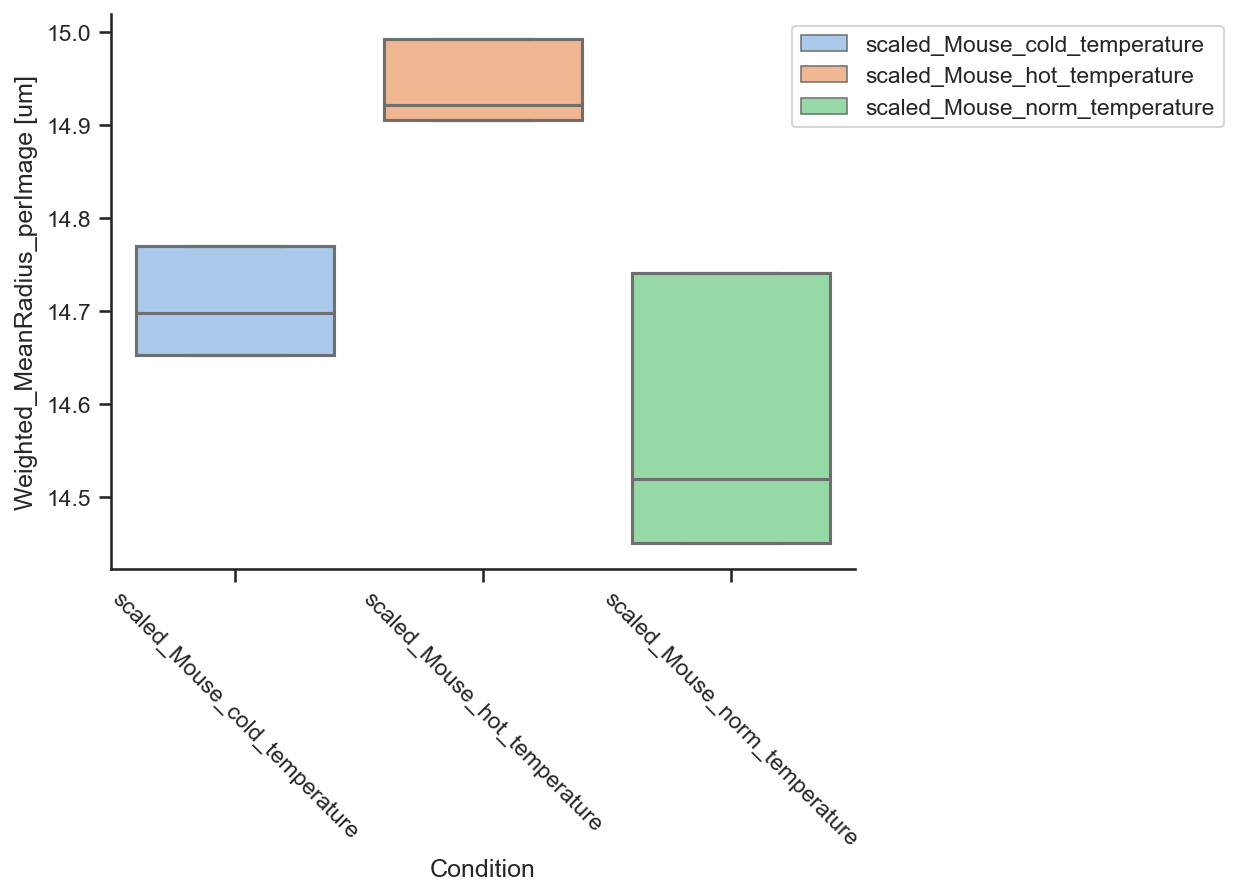

In [13]:
import scipy
import pandas as pd
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import re
import xml.etree.ElementTree as ET
from statannot import add_stat_annotation


col_name = 'Weighted_MeanRadius_perImage [um]'             # col_name = 'column_name'
                                # Fill it with the name of the column you want to analyse


plt.figure(figsize=(11, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
fig, axes = plt.subplots(dpi=150)
sns.boxplot(data=one_big_merged_frame, x='Condition', y=col_name, hue='Condition', palette='pastel', ax=axes, showfliers=0, dodge=False)
axes.set_xticklabels(axes.get_xticklabels(), rotation = -45)
legend = plt.legend(loc='upper left', bbox_to_anchor=(0.9, 1))

# Statistical tests

In [84]:
for label in labels:
    print(label, f'\n{scipy.stats.normaltest(one_big_merged_frame[one_big_merged_frame.Condition == label][col_name])}',
          '\nVarriance: ', np.var(one_big_merged_frame[one_big_merged_frame.Condition == label][col_name]))
conditions = one_big_merged_frame['Condition'].unique()
box_pairs = list(itertools.combinations(conditions, 2))
for pair in box_pairs:
    print(f'Pair of samples:', pair, '\nAnalysis result:',
          scipy.stats.mannwhitneyu(one_big_merged_frame[one_big_merged_frame.Condition == pair[0]][col_name],
          one_big_merged_frame[one_big_merged_frame.Condition == pair[1]][col_name]))

scaled_Mouse_cold_temperature 
NormaltestResult(statistic=7937.756181580852, pvalue=0.0) 
Varriance:  14419593174.065918
scaled_Mouse_cold_temperature 
NormaltestResult(statistic=7937.756181580852, pvalue=0.0) 
Varriance:  14419593174.065918
scaled_Mouse_cold_temperature 
NormaltestResult(statistic=7937.756181580852, pvalue=0.0) 
Varriance:  14419593174.065918
scaled_Mouse_hot_temperature 
NormaltestResult(statistic=1361.9348585876376, pvalue=1.8180386086641e-296) 
Varriance:  104263408148.75528
scaled_Mouse_hot_temperature 
NormaltestResult(statistic=1361.9348585876376, pvalue=1.8180386086641e-296) 
Varriance:  104263408148.75528
scaled_Mouse_hot_temperature 
NormaltestResult(statistic=1361.9348585876376, pvalue=1.8180386086641e-296) 
Varriance:  104263408148.75528
scaled_Mouse_norm_temperature 
NormaltestResult(statistic=5380.8799308569, pvalue=0.0) 
Varriance:  33484171355.809345
scaled_Mouse_norm_temperature 
NormaltestResult(statistic=5380.8799308569, pvalue=0.0) 
Varriance:  3348

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

scaled_Mouse_cold_temperature v.s. scaled_Mouse_hot_temperature: Kruskal-Wallis paired samples with Bonferroni correction, P_val=2.977e-69 stat=3.116e+02
scaled_Mouse_hot_temperature v.s. scaled_Mouse_norm_temperature: Kruskal-Wallis paired samples with Bonferroni correction, P_val=7.311e-16 stat=6.721e+01
scaled_Mouse_cold_temperature v.s. scaled_Mouse_norm_temperature: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.637e-54 stat=2.439e+02


<Figure size 1100x400 with 0 Axes>

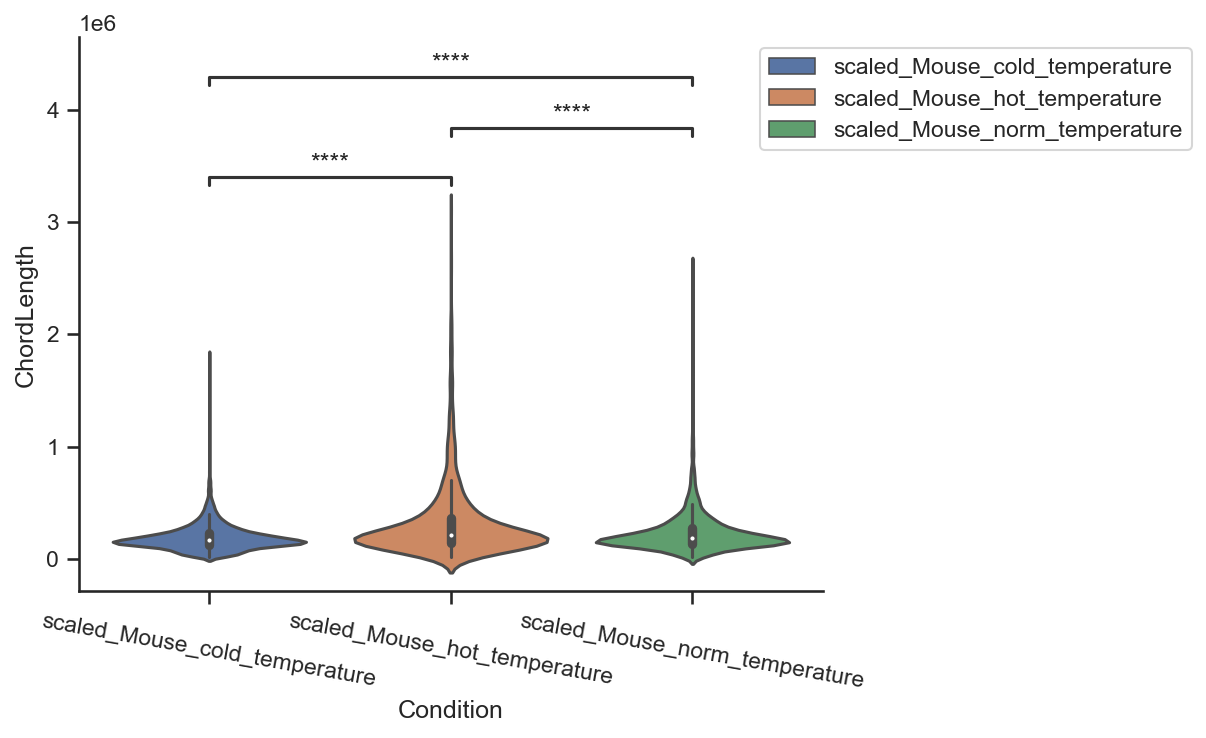

In [85]:
plt.figure(figsize=(11, 4))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
fig, axes = plt.subplots(dpi=150)
sns.violinplot(data = one_big_merged_frame, x ='Condition',
               y = col_name, hue ='Condition', palette = None,
               ax=axes, showfliers = True, dodge = False)
axes.set_xticklabels(axes.get_xticklabels(), rotation = -10)
legend = plt.legend(loc ='upper left', bbox_to_anchor=(0.9, 1))

test_results = add_stat_annotation(axes, data = one_big_merged_frame, x ='Condition',
                                   y = col_name, box_pairs = box_pairs,
                                   test ='Kruskal', text_format ='star',
                                   loc = 'inside', verbose=2)